In [1]:
from matplotlib.pyplot import show as show_static
import matplotlib.pyplot as plt
import numpy as np
import sys
import glob
from scipy import stats

sys.path.append('../../')
from utils import dataframe_utils, clustering_utils

In [2]:
microarray_data_pattern = './tgd2024_may15_avg_scan_stats_microarray/*.csv'

rna_seq_data_pattern = './tgd2024_may15_avg_scan_stats_rna_seq/*.csv'

microarray_stats_files = glob.glob(microarray_data_pattern) + glob.glob('./tgd2024_may15_avg_scan_stats_microarray/nc/*.csv')

rna_seq_stats_files = glob.glob(rna_seq_data_pattern) + glob.glob('./tgd2024_may15_avg_scan_stats_rna_seq/nc/*.csv')

microarray_stats_df = dataframe_utils.csv_files_to_df(microarray_stats_files)

rna_seq_stats_df = dataframe_utils.csv_files_to_df(rna_seq_stats_files)

/Users/michaelbertagna/git/TGNE-2022/TGNE/clustering_optimization/../../utils/dataframe_utils.py:64: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support sep=None with delim_whitespace=False; you can avoid this warning by specifying engine='python'.
  curr_df = pd.read_csv(f, sep=sep, names=cols)
/Users/michaelbertagna/git/TGNE-2022/TGNE/clustering_optimization/../../utils/dataframe_utils.py:64: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support sep=None with delim_whitespace=False; you can avoid this warning by specifying engine='python'.
  curr_df = pd.read_csv(f, sep=sep, names=cols)
/Users/michaelbertagna/git/TGNE-2022/TGNE/clustering_optimization/../../utils/dataframe_utils.py:64: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support sep=None with delim_whitespace=False; you can avoid this warning by specifying engine='python'.
  curr_df = pd.read_csv(f, sep=sep, name

In [3]:
microarray_stats_df['fraction_clusters_enriched'] = microarray_stats_df.apply(clustering_utils.compute_fraction_clusters_enriched, axis=1)

In [4]:
rna_seq_stats_df['fraction_clusters_enriched'] = rna_seq_stats_df.apply(clustering_utils.compute_fraction_clusters_enriched, axis=1)

0.6514668280565025 0.0014226700334290028 8.080222817146694e-05
1359.9970312126363 309
0.0 0.05
True


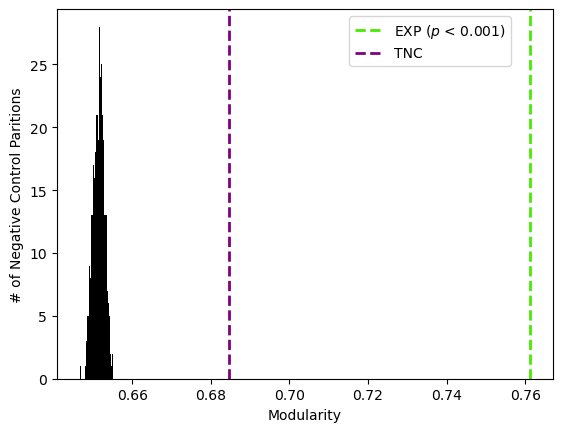

0.7619869806562761 0.0014845319100364129 8.431574666225796e-05
184.6526637487216 309
2.80497e-318 0.05
True


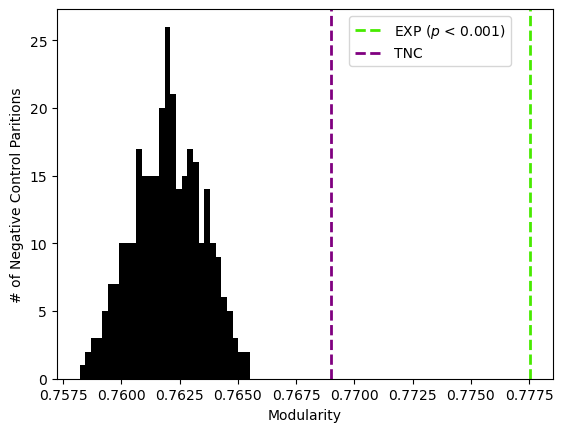

In [13]:
dfs = [microarray_stats_df, rna_seq_stats_df]

for df_stats in dfs:

    df_stats_exp = df_stats.loc[
        (df_stats['partition_type'] == 'EXP')
        &
        (df_stats['metric'] == 'manhattan')
        &
        (df_stats['nns'] == 3)
        &
        (df_stats['parameter'] == 0.005)
                                ]
    df_stats_nc = df_stats.loc[df_stats['partition_type'] == 'NC']
    df_stats_tnc = df_stats.loc[df_stats['partition_type'] == 'TNC']
    # hist_clustering_metric = 'silhouette_score'
    hist_clustering_metric = 'modularity'

    hist_data = df_stats_nc[hist_clustering_metric].values
    hist_data
    exp_line_at_x = df_stats_exp[hist_clustering_metric].values[0]
    exp_line_at_x
    tnc_line_at_x = df_stats_tnc[hist_clustering_metric].values[0]
    tnc_line_at_x
    # Create the histogram
    plt.hist(hist_data, bins=30, color='black')

    # Add a vertical line at the specified x value
    # plt.axvline(x=exp_line_at_x, color='red', linestyle='dashed', linewidth=2, label='EXP at x={} ($P$ < 0.001)'.format(round(exp_line_at_x, 2)))
    # plt.axvline(x=tnc_line_at_x, color='blue', linestyle='dashed', linewidth=2, label='TNC at x={}'.format(round(tnc_line_at_x, 2)))
    plt.axvline(x=exp_line_at_x, color='#47EA00', linestyle='dashed', linewidth=2, label='EXP ($p$ < 0.001)')
    plt.axvline(x=tnc_line_at_x, color='purple', linestyle='dashed', linewidth=2, label='TNC')


    # Add labels and title
    plt.xlabel(hist_clustering_metric.capitalize())
    plt.ylabel('# of Negative Control Paritions')
    # plt.title(f'{len(hist_data)} Neg. Controls vs. Experimental {hist_clustering_metric.capitalize()} Distribution')

    plt.legend(bbox_to_anchor=(0.575, 1))

    nc_mean = df_stats_nc[hist_clustering_metric].mean()
    nc_std = df_stats_nc[hist_clustering_metric].std()

    nc_se = nc_std / (np.sqrt(len(hist_data)))

    print(nc_mean, nc_std, nc_se)

    t_stat = (exp_line_at_x - nc_mean) / nc_se

    d_freedom = len(hist_data) - 1

    print(t_stat, d_freedom)

    # p_value = 2 * (1 - stats.t.cdf(abs(t_stat), d_freedom))
    p_value = 2 * stats.t.sf(abs(t_stat), d_freedom)

    alpha = 0.05

    print(p_value, alpha)
    print(p_value < alpha)

    # Show the plot
    plt.show()

In [12]:
df_stats_nc['silhouette_score'].mean()

-0.05620262004384093

In [13]:
df_stats_nc['silhouette_score'].median()

-0.0559447250659985

In [14]:
df_stats_nc['silhouette_score'].max()

-0.0520428030230455

In [15]:
df_stats_nc['modularity'].mean()

0.6514668280565025

In [16]:
df_stats_nc['modularity'].median()

0.651583955617214

In [17]:
df_stats_nc['modularity'].max()

0.6551707659573883

In [18]:
nc_mean = df_stats_nc[hist_clustering_metric].mean()
nc_std = df_stats_nc[hist_clustering_metric].std()

nc_se = nc_std / (np.sqrt(len(hist_data)))

nc_mean, nc_std, nc_se

(0.6514668280565025, 0.0014226700334290028, 8.080222817146694e-05)

In [19]:
t_stat = (exp_line_at_x - nc_mean) / nc_se

d_freedom = len(hist_data) - 1

t_stat, d_freedom

(1359.9970312126363, 309)

In [20]:
p_value = 2 * (1 - stats.t.cdf(abs(t_stat), d_freedom))
p_value

0.0

In [21]:
p_value = 2 * stats.t.sf(abs(t_stat), d_freedom)
p_value

0.0

In [23]:
alpha = 0.05
alpha

0.05

In [24]:
p_value < alpha

True